# Car Price Prediction using Machine Learning 

The goal of this project is to use various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting price of a car.


## 1. Problem definition

The problem presented in this notebook is building a regression model that predicts price of a car, based on given features.

## 2. Data

Dataset comes from and is avaiable on Kaggle -> [Car Price Prediction](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)

The dataset is a CSV file with 19237 rows and 18 columns (Includes Price Column as Target).

## 3. Evaluation

Main evaluation metric will be coefficient of determination (R^2) which informs about the proportion of the variation in the dependent variable that is predictable from the independent variables.

## 4. Features

* ID
* Price: price of the care(Target Column)
* Levy
* Manufacturer
* Model
* Prod. year
* Category
* Leather interior
* Fuel type
* Engine volume
* Mileage
* Cylinders
* Gear box type
* Drive wheels
* Doors
* Wheel
* Color
* Airbags

In [1]:
# Importing tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

## 5. Data cleaning and preparation

### Importing data

In [2]:
df = pd.read_csv("car_price_prediction.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

### Duplicates handling

At first I'm going to check if there are any duplicates in the dataset and if so remove them.

In [4]:
df.duplicated().sum()

313

In [5]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19232    False
19233    False
19234    False
19235    False
19236    False
Length: 19237, dtype: bool

In [6]:
duplicate = df[df.duplicated()]
duplicate

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [7]:
duplicate_example = df[df["ID"] == 45815372]
duplicate_example

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
330,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
7138,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
7796,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
9965,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
10338,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4


In [8]:
df.drop_duplicates(inplace=True)
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [9]:
df.duplicated().sum()

0

### Checking if there are missing values

In [10]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

It seems like there is no missing values in this dataset, but actually in "Levy" column there are some valuse marked as "-". I'll handle them later on.

### Dropping "ID" column

In [11]:
df.drop("ID", axis=1, inplace=True)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Changing "Mileage" column to numerical

Mileage column should be numerical but because there is added an km unit to the values, python recognizes it as an "object" type. Im going to get rid of the unit and change type of this column into integer.

In [12]:
df["Mileage"].head(20)

0     186005 km
1     192000 km
2     200000 km
3     168966 km
4      91901 km
5     160931 km
6     258909 km
7     216118 km
8     398069 km
9     128500 km
10    184467 km
11         0 km
12    350000 km
13    138038 km
14     76000 km
15     74146 km
16    121840 km
17     54317 km
18    295059 km
19    364523 km
Name: Mileage, dtype: object

In [13]:
# Replacing km in Milage column
df["Mileage"] = df["Mileage"].str.replace("[\ km]", "").astype(int)
df

C:\Users\rossa\AppData\Local\Temp\ipykernel_19796\3574055048.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Mileage"] = df["Mileage"].str.replace("[\ km]", "").astype(int)


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  int32  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

Now the "Mileage" column is an "int" type.

I'll rename the column to "Mileage (Km)" because I want to keep the information about the unit it was measured in.

In [15]:
df = df.rename(columns={"Mileage": "Mileage (Km)"})
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage (Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


### Repairing Doors column

In column "Doors" there seems to be a problem with displaying the values. The values are turned into dates instead of showing how many doors the car has.

In [16]:
# Repairing Doors column
df["Doors"].replace({"02-Mar": "2-3", "04-May": "4-5"}, inplace=True)
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage (Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2-3,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,4-5,Left wheel,Black,4


### Changing "Engine volume" column to numerical

Some of the values in "Engine volume" column are marked as "Turbo" and this column is treated as an "object" type because of that. I would like it to be a "float" type. So I'm going to make a new column named "Engine Turbo" which takes value 1 if an engine volumn is marked as turbo and 0 if it is not. Then I'll remove the "Turbo" suffix from "Engine volume" column.

In [17]:
pd.unique(df["Engine volume"])

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [18]:
df["Engine Turbo"] = np.where(df["Engine volume"].str.contains("Turbo"), 1, 0)
df.tail(20)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage (Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine Turbo
19217,26017,1624,LEXUS,ES 300,2009,Sedan,Yes,Petrol,3.5,132700,4.0,Automatic,Front,4-5,Left wheel,White,4,0
19218,30,-,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,4-5,Right-hand drive,Green,9,0
19219,19444,-,TOYOTA,Prius,2013,Sedan,No,Hybrid,1.8,140607,4.0,Automatic,Front,4-5,Left wheel,Grey,12,0
19220,8467,-,MITSUBISHI,Outlander,2004,Universal,No,CNG,2.4,140000,6.0,Automatic,4x4,4-5,Left wheel,Silver,6,0
19221,15681,-,VOLKSWAGEN,Jetta,2013,Sedan,Yes,Petrol,2.5,81200,5.0,Manual,Front,4-5,Left wheel,Silver,12,0
19222,10036,639,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2,735970,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0
19223,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0,4.0,Automatic,Front,4-5,Left wheel,Blue,4,0
19224,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800,4.0,Automatic,Front,4-5,Left wheel,Black,12,0
19225,8781,1107,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7 Turbo,236000,4.0,Manual,Front,4-5,Left wheel,Beige,4,1
19226,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000,6.0,Tiptronic,Rear,4-5,Right-hand drive,White,0,0


In [19]:
df["Engine volume"] = df["Engine volume"].str.replace("[\ Turbo]", "").astype(float)
df

C:\Users\rossa\AppData\Local\Temp\ipykernel_19796\326871019.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Engine volume"] = df["Engine volume"].str.replace("[\ Turbo]", "").astype(float)


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage (Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,0
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2-3,Left wheel,Silver,5,1
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4,0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,4-5,Left wheel,Black,4,0


### Levy

As I meantioned before in "Levy" column there is used "-" symbol which stands for missing values. But python shows that there is no missing values. To correct it I would replace all of the "-" with "Nan".

In [20]:
df['Levy'].replace({'-':np.nan}, inplace = True)
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage (Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,0
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2-3,Left wheel,Silver,5,1
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4,0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,4-5,Left wheel,Black,4,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              13215 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage (Km)      18924 non-null  int32  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

In [22]:
df['Levy'] = df['Levy'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              13215 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage (Km)      18924 non-null  int32  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

In [23]:
df.isna().sum()

Price                  0
Levy                5709
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage (Km)           0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Engine Turbo           0
dtype: int64

I'll take care of missing values after spliting data into training and testing sests to avoid possibility of information leakage.

### Outliers handling

As a outlier detection algorithm, I'll use IQR calculation and delete all of the values which are higher or lower than 1.5 IQR.

In [24]:
def find_outliers(df, features, thold):
    outlier_indices = []
    
    for col in features:
        # 1st quartile
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile
        Q3 = np.percentile(df[col], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their indeces
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)
    
    
    return outlier_indices

In [25]:
features = ["Price", "Mileage (Km)"]
outliers = find_outliers(df, features, 1.5)
no_outliers_df = df.drop(df.loc[outliers].index, axis=0)
print(f"Deleted {df.shape[0] - no_outliers_df.shape[0]} rows after removing outliers from Price and Mileage Columns")

Deleted 1687 rows after removing outliers from Price and Mileage Columns


### Categorical variables

Now I"ll look at categorical variables in this dataset.

In [26]:
no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17237 non-null  int64  
 1   Levy              11955 non-null  float64
 2   Manufacturer      17237 non-null  object 
 3   Model             17237 non-null  object 
 4   Prod. year        17237 non-null  int64  
 5   Category          17237 non-null  object 
 6   Leather interior  17237 non-null  object 
 7   Fuel type         17237 non-null  object 
 8   Engine volume     17237 non-null  float64
 9   Mileage (Km)      17237 non-null  int32  
 10  Cylinders         17237 non-null  float64
 11  Gear box type     17237 non-null  object 
 12  Drive wheels      17237 non-null  object 
 13  Doors             17237 non-null  object 
 14  Wheel             17237 non-null  object 
 15  Color             17237 non-null  object 
 16  Airbags           17237 non-null  int64 

In [27]:
df["Model"].value_counts()

Prius                     1069
Sonata                    1067
Camry                      929
Elantra                    910
E 350                      534
                          ... 
1500,1600 Schtufenheck       1
E 420                        1
C 250 luxury                 1
Passat sport                 1
Prius C aqua                 1
Name: Model, Length: 1590, dtype: int64

In [28]:
df["Manufacturer"].value_counts()

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64

In [29]:
pd.unique(df["Manufacturer"])

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [30]:
pd.set_option('float_format', '{:.2f}'.format)

### Categorical features visualization

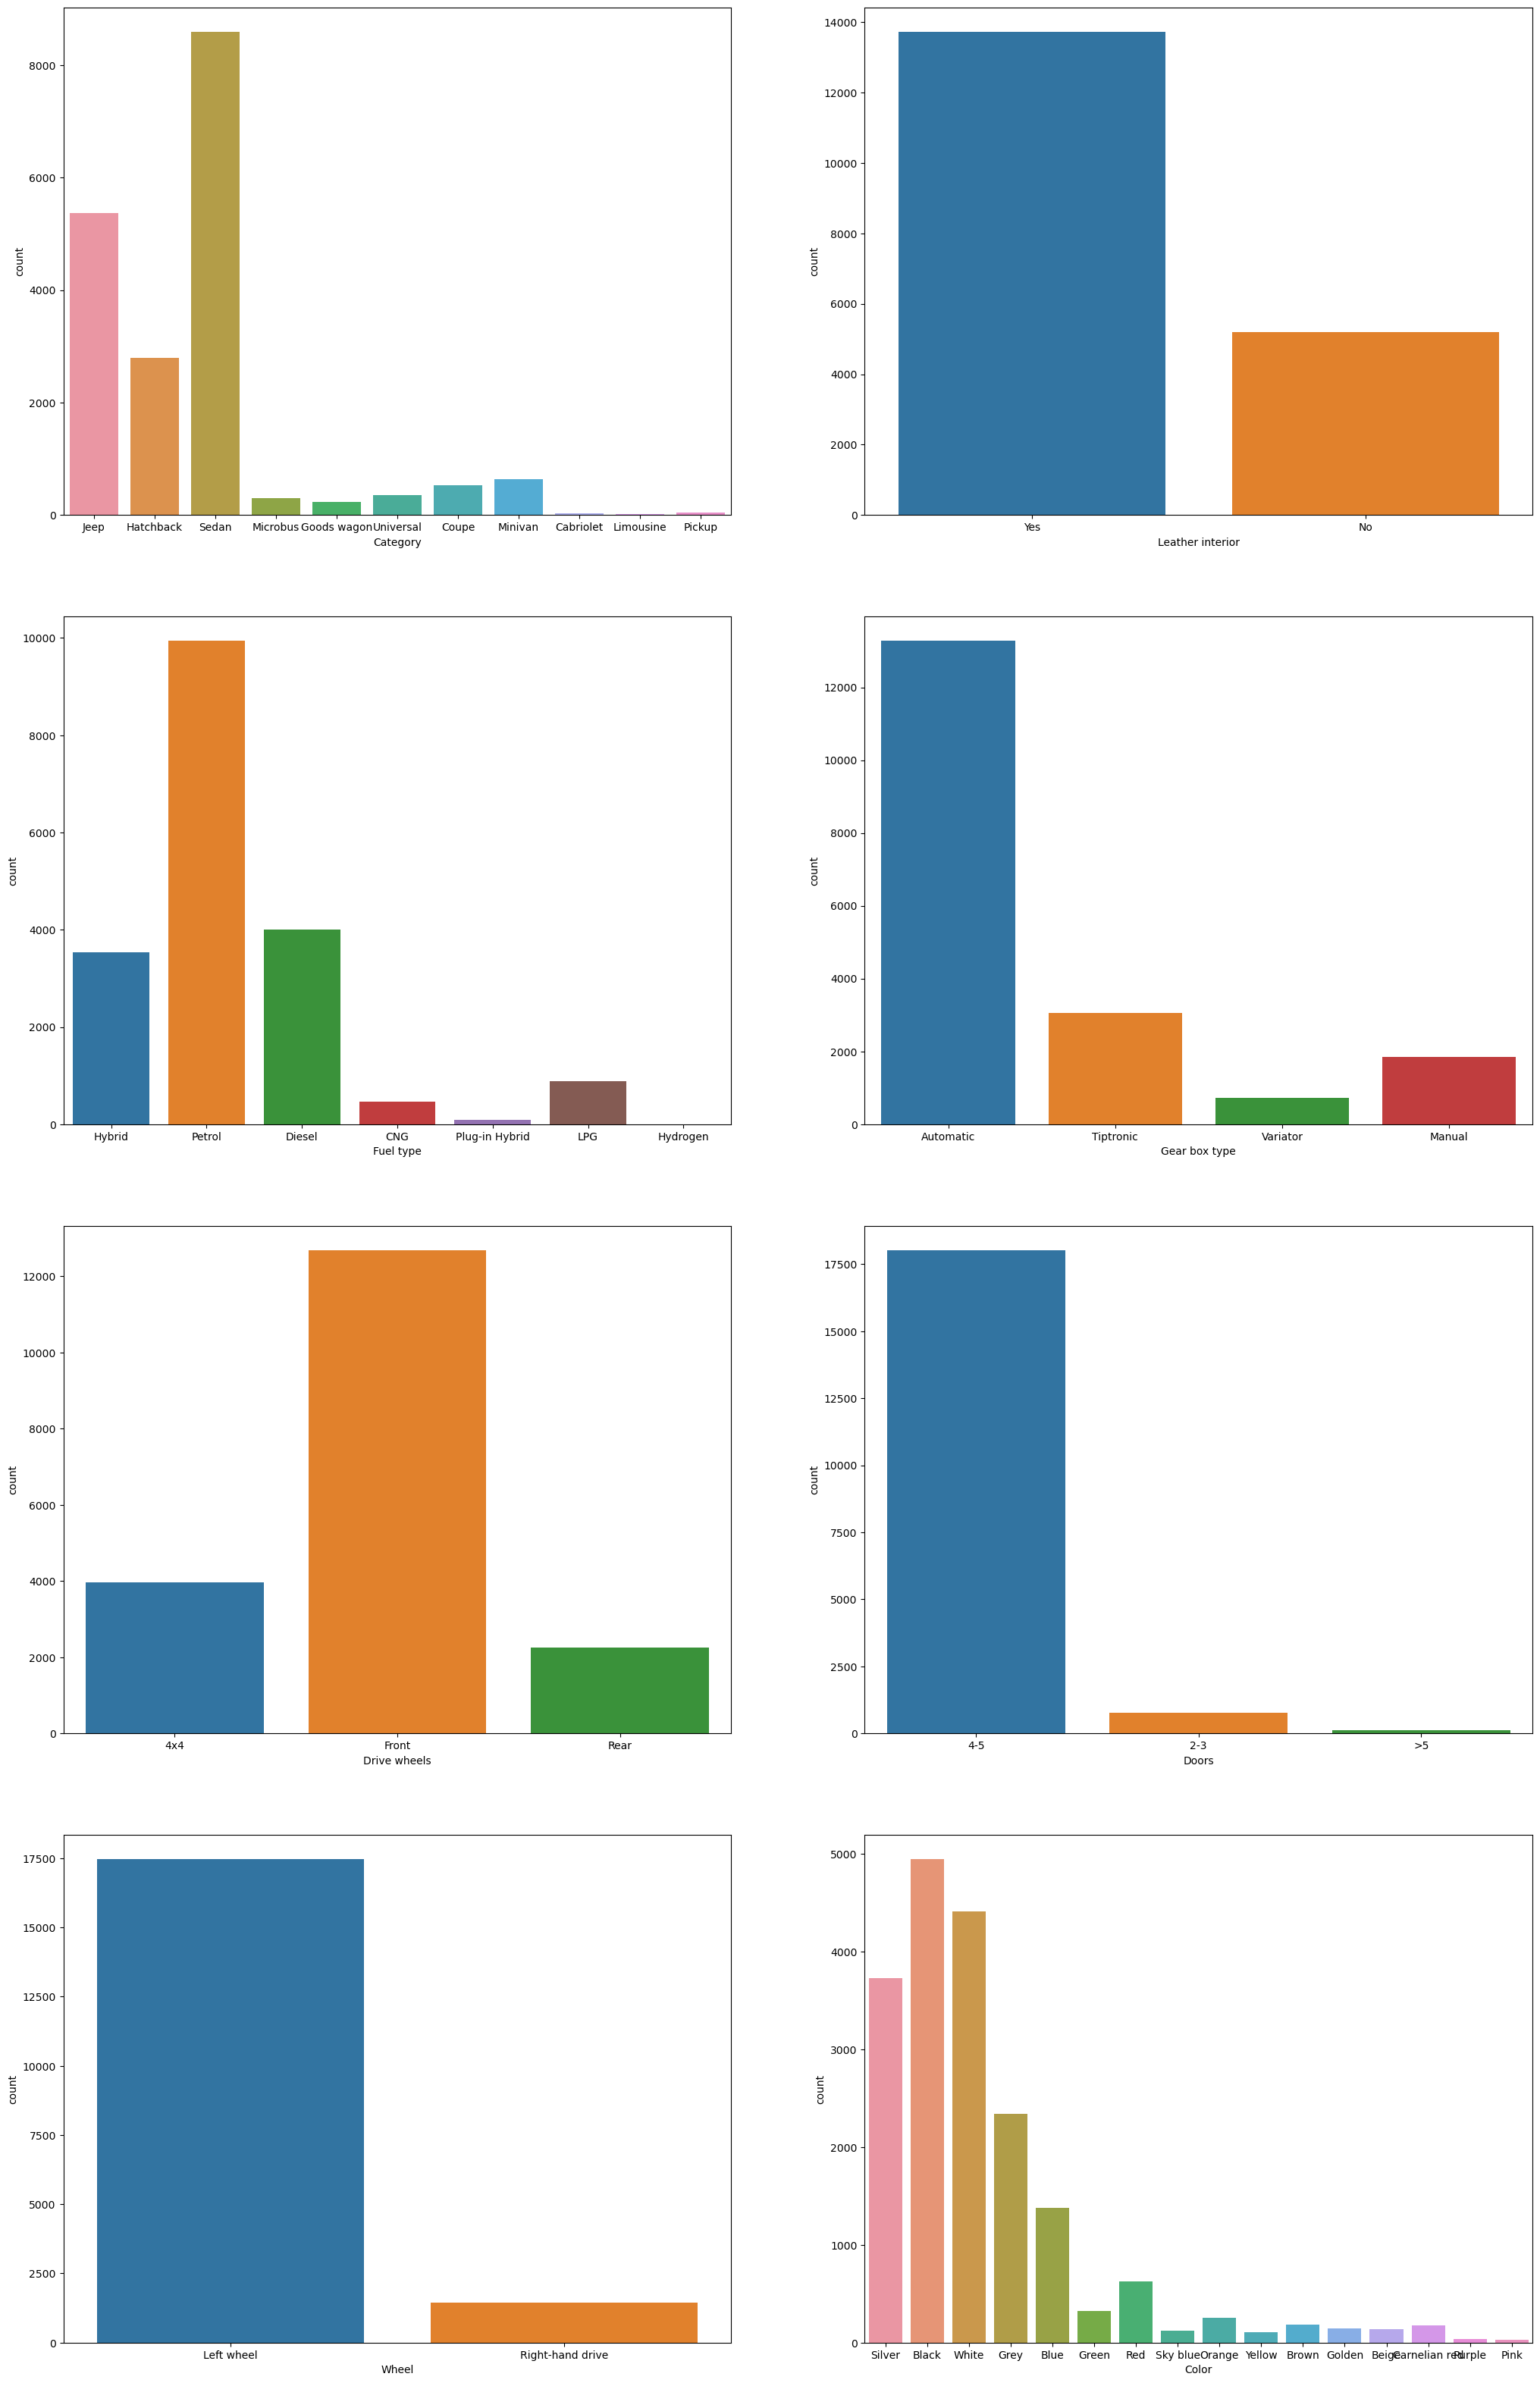

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25,40))
sns.countplot(data=df, x='Category', ax=axes[0][0])
sns.countplot(data=df, x='Leather interior', ax=axes[0][1])
sns.countplot(data=df, x='Fuel type', ax=axes[1][0])
sns.countplot(data=df, x='Gear box type', ax=axes[1][1])
sns.countplot(data=df, x='Drive wheels', ax=axes[2][0])
sns.countplot(data=df, x='Doors', ax=axes[2][1])
sns.countplot(data=df, x='Wheel', ax=axes[3][0])
sns.countplot(data=df, x='Color', ax=axes[3][1]);

### Numerical features visualization

In [32]:
no_outliers_df.describe()

,Price,Levy,Prod. year,Engine volume,Mileage (Km),Cylinders,Airbags,Engine Turbo
count,17237.00,11955.00,17237.00,17237.00,17237.00,17237.00,17237.00,17237.00
mean,14240.97,895.24,2010.68,2.28,132519.41,4.55,6.59,0.09
std,11473.41,469.19,5.57,0.86,81491.76,1.16,4.33,0.29
min,1.00,87.00,1939.00,0.00,0.00,1.00,0.00,0.00
25%,4861.00,639.00,2009.00,1.70,71894.00,4.00,4.00,0.00
50%,12544.00,779.00,2012.00,2.00,126700.00,4.00,6.00,0.00
75%,20385.00,1055.00,2014.00,2.50,184000.00,4.00,12.00,0.00
max,47120.00,11714.00,2020.00,20.00,367053.00,16.00,16.00,1.00


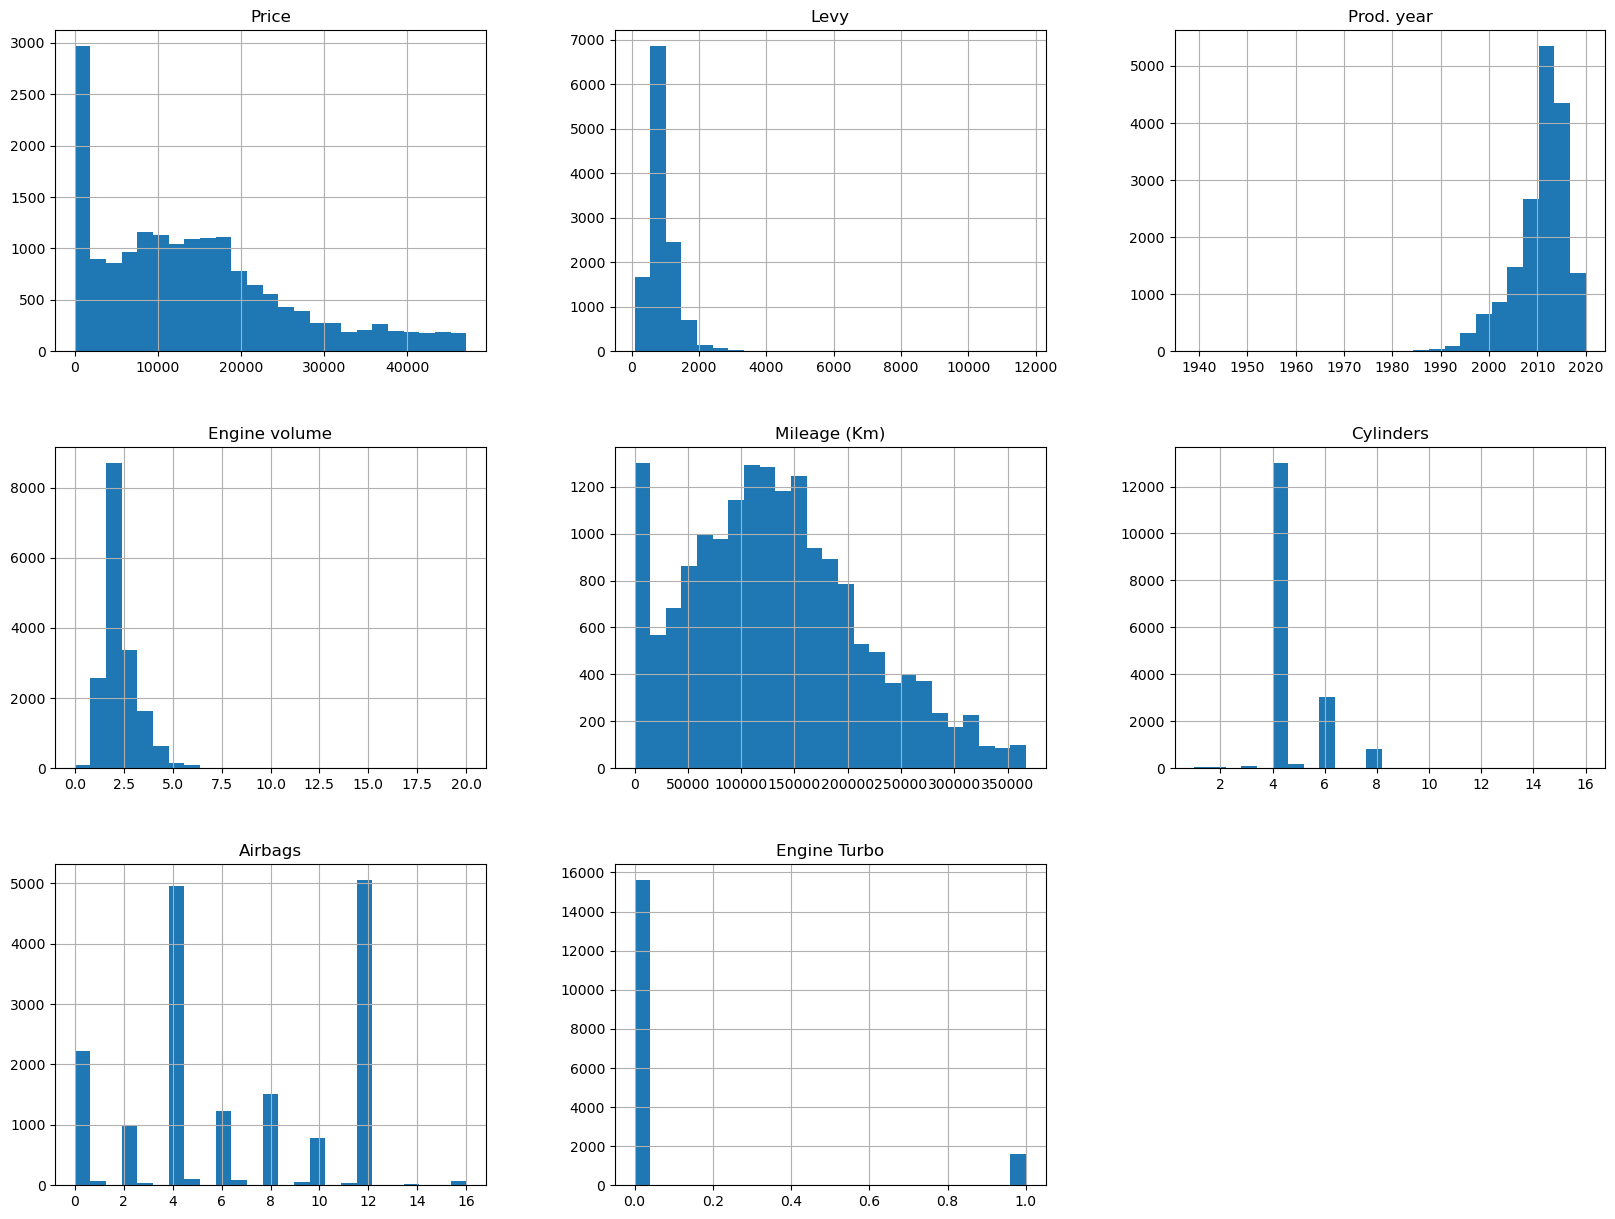

In [33]:
no_outliers_df.hist(bins=25, figsize=(20,15))
plt.show()

### Corelation

In [34]:
corr_matrix = no_outliers_df.corr()
print(corr_matrix)

               Price  Levy  Prod. year  Engine volume  Mileage (Km)  \
Price           1.00 -0.06        0.27           0.01         -0.16   
Levy           -0.06  1.00       -0.27           0.64          0.11   
Prod. year      0.27 -0.27        1.00          -0.05         -0.22   
Engine volume   0.01  0.64       -0.05           1.00          0.19   
Mileage (Km)   -0.16  0.11       -0.22           0.19          1.00   
Cylinders      -0.04  0.59       -0.12           0.77          0.16   
Airbags        -0.06  0.09        0.26           0.23         -0.02   
Engine Turbo    0.15 -0.03       -0.09          -0.05          0.01   

               Cylinders  Airbags  Engine Turbo  
Price              -0.04    -0.06          0.15  
Levy                0.59     0.09         -0.03  
Prod. year         -0.12     0.26         -0.09  
Engine volume       0.77     0.23         -0.05  
Mileage (Km)        0.16    -0.02          0.01  
Cylinders           1.00     0.17         -0.01  
Airbags   

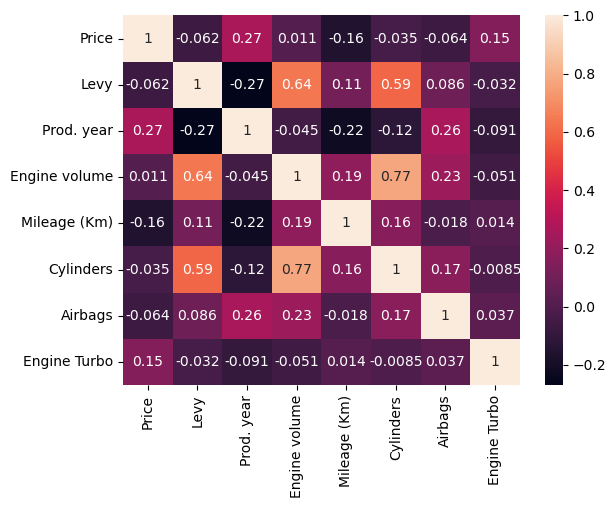

In [35]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Changing categorical variables to numbers

In [36]:
# Binary features: "Lether interior", "Engine Turbo", "Wheel"

leather_dict = {"No": 0, "Yes": 1}
wheel_dict = {"Left wheel": 0, "Right-hand drive": 1}

no_outliers_df["Leather interior"] = no_outliers_df["Leather interior"].map(leather_dict)
no_outliers_df["Wheel"] = no_outliers_df["Wheel"].map(wheel_dict)
no_outliers_df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage (Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine Turbo
0,13328,1399.00,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.50,186005,6.00,Automatic,4x4,4-5,0,Silver,12,0
1,16621,1018.00,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.00,192000,6.00,Tiptronic,4x4,4-5,0,Black,8,0
2,8467,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.30,200000,4.00,Variator,Front,4-5,1,Black,2,0
3,3607,862.00,FORD,Escape,2011,Jeep,1,Hybrid,2.50,168966,4.00,Automatic,4x4,4-5,0,White,0,0
4,11726,446.00,HONDA,FIT,2014,Hatchback,1,Petrol,1.30,91901,4.00,Automatic,Front,4-5,0,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.00,300000,4.00,Manual,Rear,2-3,0,Silver,5,1
19233,15681,831.00,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.40,161600,4.00,Tiptronic,Front,4-5,0,Red,8,0
19234,26108,836.00,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2.00,116365,4.00,Automatic,Front,4-5,0,Grey,4,0
19235,5331,1288.00,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2.00,51258,4.00,Automatic,Front,4-5,0,Black,4,0


In [37]:
# Other categorical features
final_df = pd.get_dummies(no_outliers_df, drop_first=True)
final_df

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage (Km),Cylinders,Wheel,Airbags,Engine Turbo,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399.00,2010,1,3.50,186005,6.00,0,12,0,...,0,0,0,0,0,0,1,0,0,0
1,16621,1018.00,2011,0,3.00,192000,6.00,0,8,0,...,0,0,0,0,0,0,0,0,0,0
2,8467,NaN,2006,0,1.30,200000,4.00,1,2,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.00,2011,1,2.50,168966,4.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.00,2014,1,1.30,91901,4.00,0,4,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,1999,1,2.00,300000,4.00,0,5,1,...,0,0,0,0,0,0,1,0,0,0
19233,15681,831.00,2011,1,2.40,161600,4.00,0,8,0,...,0,0,0,0,0,1,0,0,0,0
19234,26108,836.00,2010,1,2.00,116365,4.00,0,4,0,...,0,1,0,0,0,0,0,0,0,0
19235,5331,1288.00,2007,1,2.00,51258,4.00,0,4,0,...,0,0,0,0,0,0,0,0,0,0


Now allvariables are turned into numbers!

### Spliting data

In [38]:
# Spliting into X & y
X = final_df.drop("Price", axis=1)
y = final_df["Price"]

In [39]:
# Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

len(X_train), len(y_train), len(X_test), len(y_test)

(13789, 13789, 3448, 3448)

### Filling missing values in "Levy" Column

In [40]:
final_df.describe()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage (Km),Cylinders,Wheel,Airbags,Engine Turbo,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
count,17237.00,11955.00,17237.00,17237.00,17237.00,17237.00,17237.00,17237.00,17237.00,17237.00,...,17237.00,17237.00,17237.00,17237.00,17237.00,17237.00,17237.00,17237.00,17237.00,17237.00
mean,14240.97,895.24,2010.68,0.71,2.28,132519.41,4.55,0.08,6.59,0.09,...,0.02,0.12,0.00,0.00,0.00,0.03,0.20,0.01,0.23,0.01
std,11473.41,469.19,5.57,0.45,0.86,81491.76,1.16,0.28,4.33,0.29,...,0.13,0.33,0.07,0.04,0.05,0.18,0.40,0.08,0.42,0.07
min,1.00,87.00,1939.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4861.00,639.00,2009.00,0.00,1.70,71894.00,4.00,0.00,4.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,12544.00,779.00,2012.00,1.00,2.00,126700.00,4.00,0.00,6.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,20385.00,1055.00,2014.00,1.00,2.50,184000.00,4.00,0.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,47120.00,11714.00,2020.00,1.00,20.00,367053.00,16.00,1.00,16.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [41]:
num_imputer = SimpleImputer(strategy="median") 
num_features = ["Levy"]

imputer = ColumnTransformer([("num_imputer", num_imputer, num_features)])

filled_X_train = imputer.fit_transform(X_train) 
filled_X_test = imputer.transform(X_test)

In [42]:
X_train["Levy"] = filled_X_train
X_train.isna().sum()

Levy                0
Prod. year          0
Leather interior    0
Engine volume       0
Mileage (Km)        0
                   ..
Color_Red           0
Color_Silver        0
Color_Sky blue      0
Color_White         0
Color_Yellow        0
Length: 1591, dtype: int64

In [43]:
X_train.head(20)

,Levy,Prod. year,Leather interior,Engine volume,Mileage (Km),Cylinders,Wheel,Airbags,Engine Turbo,Manufacturer_ALFA ROMEO,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
5364,862.00,2011,1,2.50,237853,4.00,0,4,0,0,...,0,0,0,0,0,0,1,0,0,0
7257,862.00,2013,1,2.80,108800,4.00,0,4,1,0,...,0,0,0,0,0,0,0,0,1,0
12317,836.00,2010,1,2.00,271776,4.00,0,12,0,0,...,0,1,0,0,0,0,0,0,0,0
1028,583.00,2011,1,1.60,132742,4.00,0,4,0,0,...,0,0,0,0,0,0,1,0,0,0
17201,1077.00,2019,1,2.00,16013,4.00,0,12,0,0,...,0,1,0,0,0,0,0,0,0,0
18986,779.00,2013,1,2.50,131400,4.00,0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
19217,1624.00,2009,1,3.50,132700,4.00,0,4,0,0,...,0,0,0,0,0,0,0,0,1,0
5289,966.00,2009,0,2.00,107000,4.00,0,8,0,0,...,0,1,0,0,0,0,0,0,0,0
14292,779.00,2008,1,3.00,160000,6.00,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4350,663.00,2015,1,1.70,279276,4.00,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_test["Levy"] = filled_X_test
X_test.isna().sum()

Levy                0
Prod. year          0
Leather interior    0
Engine volume       0
Mileage (Km)        0
                   ..
Color_Red           0
Color_Silver        0
Color_Sky blue      0
Color_White         0
Color_Yellow        0
Length: 1591, dtype: int64

### Data scaling (standarization)

In [45]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

num_cols = ["Levy", "Prod. year", "Engine volume", "Mileage (Km)", "Cylinders", "Airbags"]


for i in num_cols:
    
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

I only applied standardization to my numerical columns and not the other features. I want to avoid assigning a distribution to categorical features.

## 6. Modelling KNN, Linear Reg, Random Forest

In [46]:
def show_scores(model, X_train, X_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training MSE": mean_squared_error(y_train, train_preds),
              "Test MSE": mean_squared_error(y_test, test_preds),
              "Training RMSE": np.sqrt(mean_squared_error(y_test, test_preds)),
              "Test RMSE": np.sqrt(mean_squared_error(y_test, test_preds)),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_test, y_test)}
    return scores

In [47]:
# Linear Regression
lin_reg = LinearRegression()

lin_reg.fit(X_train_stand, y_train)
show_scores(lin_reg, X_train_stand, X_test_stand)

{'Training MAE': 5987.633107118899,
 'Test MAE': 4831204658506.303,
 'Training MSE': 66146656.05352475,
 'Test MSE': 2.2151504102478555e+27,
 'Training RMSE': 47065384416233.72,
 'Test RMSE': 47065384416233.72,
 'Training R^2': 0.4977130921695885,
 'Test R^2': -1.686235837855427e+19}

In [48]:
# Random Forest
rf = RandomForestRegressor()

rf.fit(X_train_stand, y_train)
show_scores(rf, X_train_stand, X_test_stand)

{'Training MAE': 1299.8557842595976,
 'Test MAE': 3255.690986679153,
 'Training MSE': 5633642.496586776,
 'Test MSE': 28890547.540643804,
 'Training RMSE': 5374.992794473664,
 'Test RMSE': 5374.992794473664,
 'Training R^2': 0.9572207419352715,
 'Test R^2': 0.7800768904317941}

In [49]:
# KNN
knn = KNeighborsRegressor()

knn.fit(X_train_stand, y_train)
show_scores(knn, X_train_stand, X_test_stand)

{'Training MAE': 3385.9251432301107,
 'Test MAE': 4222.141647331787,
 'Training MSE': 30898774.13886721,
 'Test MSE': 45633637.71867749,
 'Training RMSE': 6755.267405416124,
 'Test RMSE': 6755.267405416124,
 'Training R^2': 0.7653690958254438,
 'Test R^2': 0.6526237000568497}

Random Forest Regression method gave the best results. Next I'll try to slightly improve its performance by hyperparameters tuning.

## Hyperparameters tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(88)

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train_stand, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [51]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [52]:
# Evaluate the RandomizedSearch model
show_scores(rs_model, X_train_stand, X_test_stand)

{'Training MAE': 1659.478596614282,
 'Test MAE': 3260.0800647443375,
 'Training MSE': 8402627.29236498,
 'Test MSE': 28151987.6168202,
 'Training RMSE': 5305.844665726674,
 'Test RMSE': 5305.844665726674,
 'Training R^2': 0.9361943606503971,
 'Test R^2': 0.7856990197743148}

As a final model I decided to choose Random Forest Regressor. After hyperparameters tuning, performence of the model slightly improved. Final test score is 78,57% which means that about 78% of the variability observed in the target variable is explained by the regression model. It is a quite good score!